# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The cartwheel dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Importing libraries

In [41]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [61]:
ruta ="datasets/iris/iris.csv"


# Load the dataset
data = pd.read_csv(ruta)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [62]:
print(data.shape)

data.head()


(150, 5)


,D1,D2,D3,D4,D5
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values

In [63]:
dataset = data.dropna()

print(dataset.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [64]:
# Encoding the categorical column
#dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
#dataset

# Note: this is not neesary for the cartwheel dataset, but it going to be very usefull for the Iris dataset

4. Discard columns that won't be used


In [65]:
data.drop(['D1','D2','D3'],axis='columns',inplace=True)

#Visualize the dataset
data


,D4,D5
0,0.2,Iris-setosa
1,0.2,Iris-setosa
2,0.2,Iris-setosa
3,0.2,Iris-setosa
4,0.2,Iris-setosa
...,...,...
145,2.3,Iris-virginica
146,1.9,Iris-virginica
147,2.0,Iris-virginica
148,2.3,Iris-virginica


5. Scatter plot of the data

In [86]:
plt.scatter(data.D1,data.D2)
plt.title('Dato1 vs Dato4')
plt.xlabel('Dato1')
plt.ylabel('Dato4')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'D1'

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [87]:
df1 = data[data.D5==1]
df2 = data[data.D5==2]

plt.scatter(df1.D1, df1.D2, Label='Datos 5')
plt.scatter(df2.D1, df2.D2, Label='Datos 5')

plt.title('Datos5 vs Datos5')
plt.xlabel('Datos5')
plt.ylabel('Datos5')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'D1'

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [91]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=2)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(data[['D1','D2']])

# Print estimated cluster of each point in the dataser
yp

KeyError: "None of [Index(['D1', 'D2'], dtype='object')] are in the [columns]"

In [92]:
# Add a new column to the dataset with the cluster information
data['Cluster1'] = yp

# Visualize the dataset
data

NameError: name 'yp' is not defined

In [93]:
# Visualize the ID of the clusters
data.Cluster1.unique()

AttributeError: 'DataFrame' object has no attribute 'Cluster1'

In [13]:
# Center of each cluster
km.cluster_centers_

array([[ 65.5       ,  73.94117647],
       [ 67.875     , 100.625     ]])

In [14]:
# Sum of squared error
km.inertia_

2262.1911764705883

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

In [94]:
df1 = data[data.Cluster1==0]
df2 = data[data.Cluster1==1]

plt.scatter(df1.D1, df1.D2, Label='Estimated Data 1')
plt.scatter(df2.D1, df2.D2, Label='Estimated Data 2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Data1 vs Data2')
plt.xlabel('Data1')
plt.ylabel('Data2')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Cluster1'

Plot real clusters and visual comparison

In [101]:
df1 = dataset[dataset.D5==1]
df2 = dataset[dataset.D5==2]

plt.scatter(df1.data1, df1.data2, Label='data 5 1')
plt.scatter(df2.data1, df2.data2, Label='data 5 2')

plt.title('data 1 vs data 2')
plt.xlabel('data 2')
plt.ylabel('data 2')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'data1'

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [99]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['D1','D2']])
    sse.append(km.inertia_)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


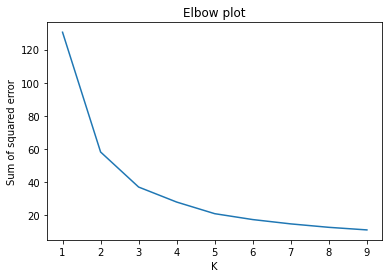

In [100]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: work with the iris dataset

 - For the following cases, do Kmean and without using min max scaling: determine whether the scaling benefits or not
 
 - Also, compute and show the elbow plot
    
1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.


2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.


3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible





5. Draw conclusiones:
    - About the scalling: does it helps or not?
    - About the elbow plot: does the K agree with the real number of clusters?
    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?